<a href="https://colab.research.google.com/github/Shifana-22/Data-Analysis-Projects/blob/main/Credit_Classifiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CLASSIFICATION PROBLEM**

C&T Bank wants to identify and understand their customers better to determine the appropriate credit amount to be offered based on multiple factors. The C&T bank possesses a vast dataset containing customer information and other relevant parameters. The C&T bank aims to develop a robust model that can accurately group customer based on their creditworthiness.
This will enable the bank to make informed decisions about the credit amount to be extended to each customer group, which can help mitigate risk, ensure responsible lending practices, and optimize loan portfolio management. Additionally, the model
can assist the bank in identifying potential high-value customers, tailoring credit offers based on risk profiles, and complying with regulatory requirements.


**PROBLEM STATEMENT:** The problem at hand is to create a reliable model that can effectively categorize customers into three groups based on various factors, enabling the bank to make data-driven decisions for credit lending and risk management.

To develop a classification model for categorizing customers into three groups based on creditworthiness, we focus on these variables : **credit_history, credits_no, poi, and duration_month**


*  credit_history: Shows **how good/bad someone's credit history** is,
impacting risk.

*  credits_no: Reveals borrowing behavior (**more credits = potentially higher risk).**

*   poi (Percentage of Income on Loan Interest): Higher % suggests **higher risk of not repaying**.

*   duration_month: Length of credit history, showing **repayment behavior over time.**

These factors, along with others, can be used to build a creditworthiness model.

# STEP1:DATA-PREPROCESSING

PRE-PROCESSING TRAINING-DATA

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/C&T train dataset.csv')
data.describe()

,sno,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,788.000000,800.000000,796.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.130084,1.106833,11.499101,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

CHECKING FOR NULL VALUES

In [ ]:
data.isnull()
null_values = data.isnull().sum()
print(null_values)

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64


HANDLING NULL VALUES BY IMPUTATION

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='mean' for numerical columns and strategy='most_frequent' for categorical columns
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

# List of numerical and categorical columns with missing values
numerical_columns_with_missing = ['poi', 'age']
categorical_columns_with_missing = ['employment_st', 'gurantors', 'housing_type']

# Impute missing values in numerical columns
data[numerical_columns_with_missing] = imputer_numeric.fit_transform(data[numerical_columns_with_missing])

# Impute missing values in categorical columns
data[categorical_columns_with_missing] = imputer_categorical.fit_transform(data[categorical_columns_with_missing])

# Check if there are any remaining missing values
null_values_after_imputation = data.isnull().sum()
print(null_values_after_imputation)


sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64


ENCODING AND SCALING VARIABLES

In [ ]:
from sklearn.preprocessing import StandardScaler

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['acc_info', 'credit_history', 'purpose', 'savings_acc', 'employment_st', 'personal_status', 'gurantors', 'property_type', 'installment_type', 'housing_type', 'job_type', 'telephone', 'foreigner'])

# Scale numerical variables
# List of numerical columns to be scaled
numerical_columns = ['sno', 'duration_month', 'poi', 'resident_since', 'age', 'credits_no', 'liables']
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the numerical columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Check the transformed dataset
print(data_encoded.head())


        sno  duration_month       poi  resident_since       age  credits_no  \
0 -1.729887       -1.205988  0.936324        1.047561  2.755946    1.060295   
1 -1.725557        2.251158 -0.848013       -0.760527 -1.169691   -0.695887   
2 -1.721227       -0.712110 -0.848013        0.143517  1.185691   -0.695887   
3 -1.716897        1.757280 -0.848013        1.047561  0.836746   -0.695887   
4 -1.712567        0.275646  0.044156        1.047561  1.534637    1.060295   

    liables  Group_no  acc_info_A11  acc_info_A12  ...  housing_type_A152  \
0 -0.415957         3          True         False  ...               True   
1 -0.415957         1         False          True  ...               True   
2  2.404093         2         False         False  ...               True   
3  2.404093         1          True         False  ...              False   
4  2.404093         1          True         False  ...              False   

   housing_type_A153  job_type_A171  job_type_A172  job_type_A

PRE-PREPROCESSING TEST-DATASET

In [ ]:
test_df = pd.read_csv('/content/C&T test dataset.csv')
test_df.describe()

,sno,duration_month,poi,resident_since,age,credits_no,liables
count,200.000000,200.000000,195.000000,200.000000,198.000000,200.000000,200.000000
mean,100.500000,21.910000,2.974359,2.860000,36.106061,1.450000,1.185000
std,57.879185,11.635671,1.081408,1.093792,11.053808,0.607739,0.389272
min,1.000000,4.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,50.750000,12.000000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,100.500000,20.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,150.250000,27.250000,4.000000,4.000000,43.000000,2.000000,1.000000
max,200.000000,60.000000,4.000000,4.000000,68.000000,4.000000,2.000000


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               200 non-null    int64  
 1   acc_info          200 non-null    object 
 2   duration_month    200 non-null    int64  
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_acc       200 non-null    object 
 6   employment_st     195 non-null    object 
 7   poi               195 non-null    float64
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    int64  
 11  property_type     200 non-null    object 
 12  age               198 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      192 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

CHECKING MISSING VALUES

In [ ]:
# Check for null values in the test dataset
null_values = test_df.isnull().sum()
print(null_values)


sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       5
poi                 5
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 2
installment_type    0
housing_type        8
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64


HANDLING MISSING VALUES BY IMPUTATION

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='mean' for numerical columns and strategy='most_frequent' for categorical columns
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

# List of numerical and categorical columns with missing values
numerical_columns_with_missing = ['poi', 'age']
categorical_columns_with_missing = ['employment_st', 'housing_type']

# Impute missing values in numerical columns
test_df[numerical_columns_with_missing] = imputer_numeric.fit_transform(test_df[numerical_columns_with_missing])

# Impute missing values in categorical columns
test_df[categorical_columns_with_missing] = imputer_categorical.fit_transform(test_df[categorical_columns_with_missing])

# Check if there are any remaining missing values
null_values_after_imputation = test_df.isnull().sum()
print(null_values_after_imputation)


sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64


ENCODING AND SCALING VARIABLES

In [ ]:
from sklearn.preprocessing import StandardScaler

# Encode categorical variables using one-hot encoding
test_data_encoded = pd.get_dummies(test_df, columns=['acc_info', 'credit_history', 'purpose', 'savings_acc', 'employment_st', 'personal_status', 'gurantors', 'property_type', 'installment_type', 'housing_type', 'job_type', 'telephone', 'foreigner'])

# Scale numerical variables using the same scaler fitted on the training data
test_data_encoded[numerical_columns] = scaler.transform(test_data_encoded[numerical_columns])

# Check the transformed test dataset
print(test_data_encoded.head())


        sno  duration_month       poi  resident_since       age  credits_no  \
0 -1.729887        0.275646  0.936324        1.047561  1.621873    1.060295   
1 -1.725557       -0.218232  0.044156        1.047561  1.098455    1.060295   
2 -1.721227       -0.053606 -1.740181        1.047561 -0.995218    1.060295   
3 -1.716897       -0.712110  0.936324        1.047561 -0.035618    1.060295   
4 -1.712567       -0.712110 -1.740181       -0.760527 -0.995218   -0.695887   

    liables  acc_info_A11  acc_info_A12  acc_info_A13  ...  housing_type_A152  \
0  2.404093         False         False         False  ...              False   
1 -0.415957         False          True         False  ...              False   
2 -0.415957          True         False         False  ...               True   
3 -0.415957         False         False         False  ...               True   
4 -0.415957         False          True         False  ...              False   

   housing_type_A153  job_type_A171  j

DATA VISUALISATION:DESCRIPTIVE ANALYSIS

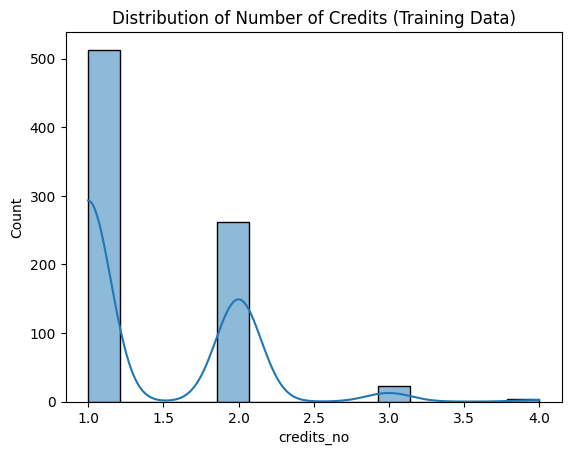

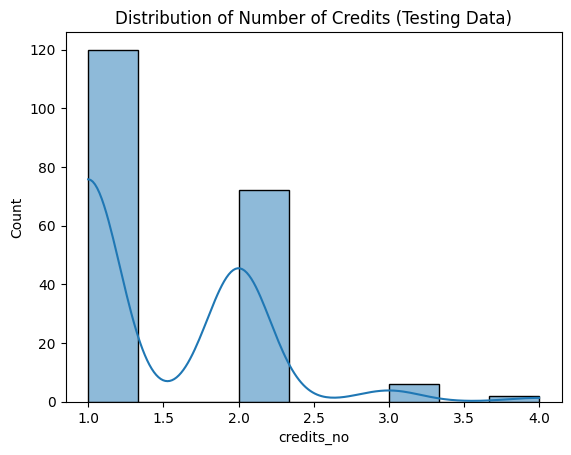

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of numerical variables in training data
sns.histplot(data=data, x='credits_no', kde=True)
plt.title('Distribution of Number of Credits (Training Data)')
plt.show()


# Similar visualizations for testing data
# Visualize distribution of numerical variables in testing data
sns.histplot(data=test_df, x='credits_no', kde=True)
plt.title('Distribution of Number of Credits (Testing Data)')
plt.show()



 Training data includes a diverse range of creditworthiness (A30-A34).

• Most people in the data have a lower number of credits (new credit users?).

• Both datasets show a varied customer base with differing credit behaviors.

• Analyzing both datasets helps build a better creditworthiness model.

• Insights can improve model development for accurate risk prediction.

• This leads to better credit decisions for the bank.

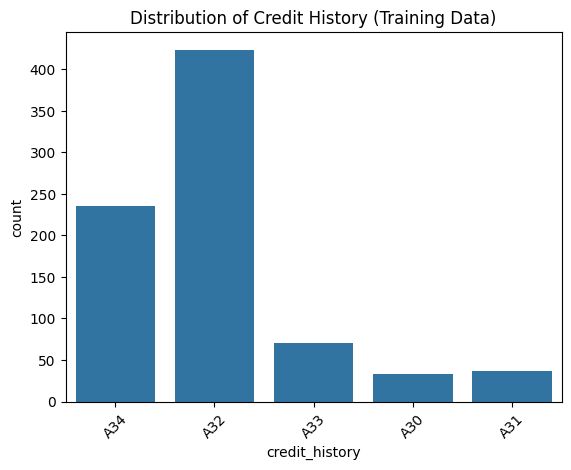

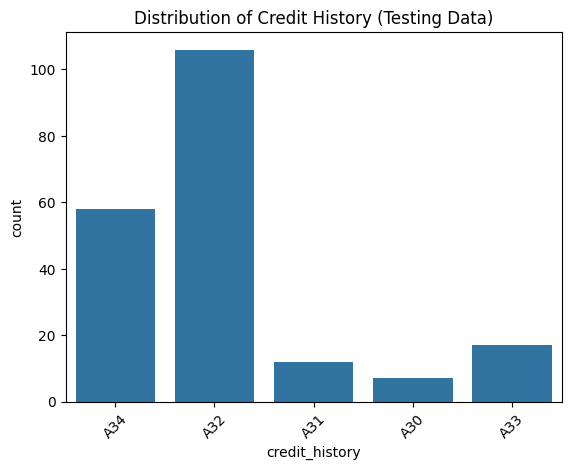

In [ ]:
# Visualize distribution of a categorical variable in training data
sns.countplot(data=data, x='credit_history')
plt.title('Distribution of Credit History (Training Data)')
plt.xticks(rotation=45)
plt.show()


# Visualize distribution of a categorical variable in testing data
sns.countplot(data=test_df, x='credit_history')
plt.title('Distribution of Credit History (Testing Data)')
plt.xticks(rotation=45)
plt.show()


• Credit history plays a significant role in loan approval for this bank.

• People with lower credit scores (A30 and A31) are more likely to be rejected.

• The bank approves loans across a range of creditworthiness levels, with a higher approval rate for those with better credit history.

Both count plots convey the importance of credit history in loan approval decisions, highlighting that individuals with lower credit scores are more likely to face loan rejections. Despite potential variations in visualization techniques, the core message remains consistent across both plots.

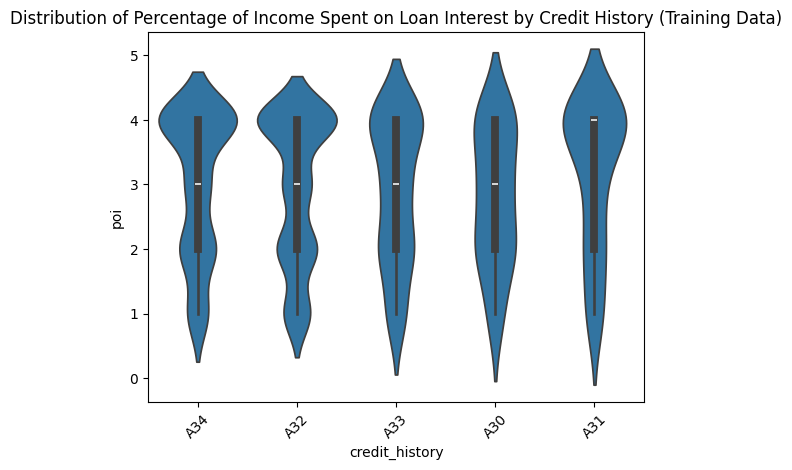

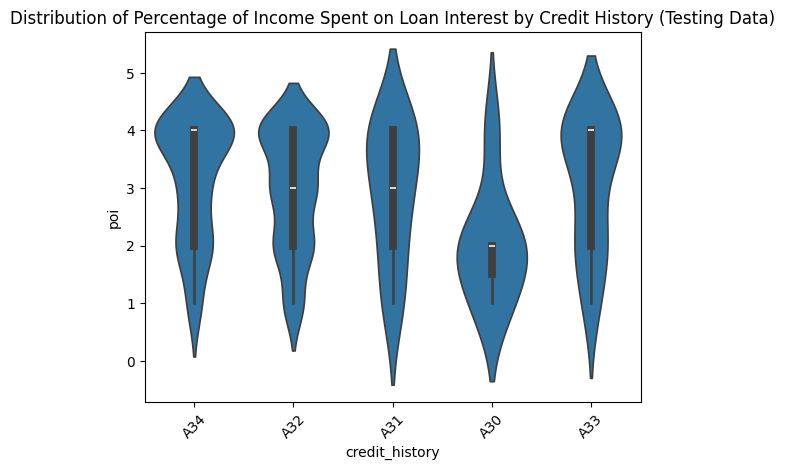

In [ ]:
# Visualize relationship between a numerical and categorical variable in training data
sns.violinplot(data=data, x='credit_history', y='poi')
plt.title('Distribution of Percentage of Income Spent on Loan Interest by Credit History (Training Data)')
plt.xticks(rotation=45)
plt.show()


# Visualize relationship between a numerical and categorical variable in testing data
sns.violinplot(data=test_df, x='credit_history', y='poi')
plt.title('Distribution of Percentage of Income Spent on Loan Interest by Credit History (Testing Data)')
plt.xticks(rotation=45)
plt.show()


Both plots show the same trends:

The violin for the lower credit history group (likely to the left on the x-axis) is wider at higher percentages of income spent on loan interest.

The center line (median) for the lower credit history group is also higher than the median for the higher credit history group.

The IQR appears to be larger for the lower credit history group.

In conclusion, both violin plots suggest that people with lower credit history tend to spend a higher percentage of their income on loan interest compared to those with higher credit history.



# STEP2:MODEL GENERATION

# MODEL1:USING SVM

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

# Define features (X) and target variable (y) for training data
X_train = data[['credit_history', 'credits_no', 'poi', 'duration_month']]
y_train = data['Group_no']  # Assuming 'Group_no' is the target variable in the training data

# Define features (X) for testing data
X_test = test_df[['credit_history', 'credits_no', 'poi', 'duration_month']]

# Define transformer for one-hot encoding of categorical variables
categorical_features = ['credit_history']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Perform one-hot encoding and feature selection using SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=2)  # Adjust k as needed
X_train_selected = selector.fit_transform(preprocessor.fit_transform(X_train), y_train)
X_test_selected = selector.transform(preprocessor.transform(X_test))  # Transform testing data with selected features

# Train SVM model using selected features
svm_model = SVC()
svm_model.fit(X_train_selected, y_train)

# Predict 'Group_no' for testing data using trained model
predicted_group_no = svm_model.predict(X_test_selected)


In [ ]:
# Predict 'Group_no' for testing data using trained model
predicted_group_no = svm_model.predict(X_test_selected)

# Print the predictions
print("Predicted Group Numbers for Testing Data:")
print(predicted_group_no)


Predicted Group Numbers for Testing Data:
[2 2 2 3 2 1 3 3 1 2 3 3 1 1 1 1 3 3 1 2 3 3 1 3 2 2 2 2 1 1 2 2 1 2 2 3 3
 3 2 2 1 2 2 2 2 2 2 2 3 3 2 2 3 2 1 2 3 3 2 2 2 2 2 2 3 2 2 2 1 3 1 3 2 3
 2 3 2 1 3 2 2 2 2 2 2 3 2 1 1 2 2 3 3 1 2 1 2 3 2 2 2 2 1 3 2 2 2 1 2 2 1
 2 2 2 2 1 2 3 2 2 2 1 3 3 2 3 2 1 2 3 2 3 3 3 3 2 3 3 1 2 2 3 2 3 3 1 2 3
 2 2 2 1 2 1 3 2 2 3 2 2 3 2 2 2 3 2 2 2 1 2 3 2 2 1 2 2 3 2 2 2 2 1 2 1 2
 3 1 2 2 2 2 3 2 1 3 3 2 3 1 1]


The cross-validation accuracy scores provide insight into the performance of your SVM model across different folds of the training dataset. Here's a breakdown of the results:

Cross-Validation Accuracy Scores:
Fold 1: 61.25%

Fold 2: 60.625%

Fold 3: 56.875%

Fold 4: 65.625%

Fold 5: 58.75%

Mean Accuracy: 60.625%

The mean accuracy of approximately 60.625% indicates the average accuracy of the model across all folds of the cross-validation process.

In [ ]:
from sklearn.model_selection import cross_val_score


# Train SVM model using selected features
svm_model = SVC()
svm_model.fit(X_train_selected, y_train)

# Perform cross-validation to evaluate model accuracy
# 'scoring' parameter can be set to different metrics such as accuracy, precision, recall, etc.
# 'cv' parameter specifies the number of folds for cross-validation
accuracy_scores = cross_val_score(svm_model, X_train_selected, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", accuracy_scores.mean())


Cross-Validation Accuracy Scores: [0.6125  0.60625 0.56875 0.65625 0.5875 ]
Mean Accuracy: 0.60625


The mean accuracy of approximately 60.625% indicates the average accuracy of the model across all folds of the cross-validation process.

# MODEL2:USING ANN

In [ ]:
# Adjust labels to start from 0
y_train_adjusted = y_train - 1  # Subtract 1 from each label to shift them to start from 0
y_val_adjusted = y_val - 1

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 output classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_adjusted, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val_adjusted))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val_adjusted)
print("Validation Accuracy:", val_accuracy)


Epoch 1/50
20/20 [==============================] - 2s 40ms/step - loss: 1.0394 - accuracy: 0.4734 - val_loss: 0.9931 - val_accuracy: 0.6187
Epoch 2/50
20/20 [==============================] - 0s 13ms/step - loss: 0.9512 - accuracy: 0.6094 - val_loss: 0.9254 - val_accuracy: 0.6062
Epoch 3/50
20/20 [==============================] - 0s 16ms/step - loss: 0.8818 - accuracy: 0.6062 - val_loss: 0.8717 - val_accuracy: 0.6187
Epoch 4/50
20/20 [==============================] - 0s 12ms/step - loss: 0.8283 - accuracy: 0.6125 - val_loss: 0.8336 - val_accuracy: 0.6187
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 0.7999 - accuracy: 0.6187 - val_loss: 0.8209 - val_accuracy: 0.6187
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.7811 - accuracy: 0.6187 - val_loss: 0.8094 - val_accuracy: 0.6187
Epoch 7/50
20/20 [==============================] - 0s 16ms/step - loss: 0.7752 - accuracy: 0.6250 - val_loss: 0.8064 - val_accuracy: 0.6187
Epoch 8/50
20/2

The accuracy of the artificial neural network (ANN) model on the validation set is approximately 62.5%. This means that the model correctly predicts the group number for about 62.5% of the instances in the validation set.

# MODEL3:USING XGBOOST -ENSEMBLE METHODS

XGBoost (Extreme Gradient Boosting) is indeed a powerful ensemble method, especially for classification tasks. It is known for its scalability, efficiency, and excellent performance across a wide range of datasets.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Assuming you have your training data in a DataFrame called 'data'
# And 'Group_no' is your target variable
X = data[['duration_month', 'credit_history', 'credits_no', 'poi']]  # Features
y = data['Group_no']  # Target variable

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBoost classifier
model = XGBClassifier()


# Convert target variable to start from 0
y_train -= 1  # Subtract 1 from each class label
y_test -= 1   # Subtract 1 from each class label

# Instantiate XGBoost classifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.575


HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(objective='multi:softmax', num_class=3, seed=42)

# Perform grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.6343512790136457


In [ ]:
import xgboost as xgb

# Set the best parameters
best_params = {
    'colsample_bytree': 1.0,
    'gamma': 0.1,
    'learning_rate': 0.01,
    'max_depth': 9,
    'min_child_weight': 5,
    'n_estimators': 200,
    'subsample': 0.8
}

# Initialize XGBoost classifier with the best parameters
xgb_classifier = xgb.XGBClassifier(**best_params)

# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6


It seems like the accuracy of the XGBoost model with the best hyperparameters obtained from the grid search is 0.6. While it's an improvement from the previous accuracy of 0.575, there's still room for further improvement.

# MODEL4:LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.61875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It looks like the Logistic Regression model achieved an accuracy of approximately 0.61875 on your testing data. This indicates that the model correctly predicted the class label for about 61.875% of the instances in the testing set.

# MODEL5:RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.59375


The accuracy of the Random Forest classifier on your test data is 0.59375, which means it correctly classified approximately 59.375% of the instances in the test set.

# USING GRADIENT BOOSTING AND RANDOM FOREST AFTER HYPERPARAMETER TUNING


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your training dataset
train_data = data

# Perform feature engineering on training data
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train_data[column] = label_encoders[column].fit_transform(train_data[column])

# Split training data into features (X) and target (y)
X_train = train_data.drop(columns=["Group_no"])
y_train = train_data["Group_no"]

# Load your testing dataset
test_data = test_df

# Perform feature engineering on testing data
for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = label_encoders[column].transform(test_data[column])

# Split testing data into features (X) and target (y)
X_test = test_data  # No need to drop "Group_no" column
# y_test is not available, assuming it's not needed for prediction

# Hyperparameter tuning with Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Score (Random Forest):", grid_search_rf.best_score_)

# Hyperparameter tuning with Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}
gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
print("Best Parameters (Gradient Boosting):", grid_search_gb.best_params_)
print("Best Score (Gradient Boosting):", grid_search_gb.best_score_)

# Hyperparameter tuning with Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr = LogisticRegression(max_iter=1000, random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best Parameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best Score (Logistic Regression):", grid_search_lr.best_score_)

# Use the best models from hyperparameter tuning
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_
best_lr = grid_search_lr.best_estimator_

# Predictions on the testing dataset
y_pred_rf = best_rf.predict(X_test)



Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Score (Random Forest): 0.66125
Best Parameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best Score (Gradient Boosting): 0.6449999999999999


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters (Logistic Regression): {'C': 1, 'solver': 'lbfgs'}
Best Score (Logistic Regression): 0.6475


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Predictions using Gradient Boosting model
y_pred_gb = best_gb.predict(X_test)

# Predictions using Logistic Regression model
y_pred_lr = best_lr.predict(X_test)

# Output predictions for further analysis or submission
# Assuming you want to save predictions to a CSV file
predictions_df = pd.DataFrame({'Gradient_Boosting_Predictions': y_pred_gb, 'Logistic_Regression_Predictions': y_pred_lr})
predictions_df.to_csv('predictions.csv', index=False)

# Alternatively, you can print the predictions
print("Gradient Boosting Predictions:", y_pred_gb)
print("Logistic Regression Predictions:", y_pred_lr)


Gradient Boosting Predictions: [2 2 2 3 3 1 3 3 1 3 3 3 1 1 1 2 2 2 2 3 3 2 2 3 2 2 2 2 2 2 2 2 1 2 2 3 3
 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 3 1 3 3 2 2 2 2 2 2 2 2 2 2 2 2 3 1 2 2 3
 2 3 2 2 2 1 2 2 2 2 2 3 2 1 1 2 2 3 3 1 2 2 2 2 2 2 2 2 1 3 2 2 2 2 2 2 2
 2 2 2 2 1 2 1 2 2 2 1 3 2 2 3 2 1 2 3 2 3 2 3 3 1 3 3 2 1 2 2 2 2 2 1 2 2
 2 2 2 1 2 1 3 2 2 2 2 2 2 2 2 2 3 2 2 2 1 2 3 2 2 2 2 2 2 2 3 2 2 1 2 2 2
 3 1 2 2 2 2 3 2 2 3 2 2 3 2 1]
Logistic Regression Predictions: [2 2 1 3 2 1 3 3 1 2 3 3 1 1 1 1 2 2 1 3 3 2 1 3 1 2 1 2 1 1 2 2 1 1 2 3 3
 3 2 2 2 2 3 2 2 1 1 2 3 3 2 1 3 3 1 2 3 3 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3
 2 3 1 2 3 1 1 1 2 3 2 3 2 1 1 2 1 3 3 1 3 1 2 3 2 2 2 1 1 2 2 2 2 1 2 2 2
 2 1 2 2 1 2 1 1 2 2 1 3 2 1 3 2 1 2 3 2 3 3 3 3 1 3 3 1 1 2 3 2 3 2 1 2 3
 2 1 2 1 2 1 3 2 2 3 2 2 2 1 2 1 3 2 2 2 1 2 3 2 1 1 2 2 2 2 2 2 1 1 1 1 2
 3 1 2 1 2 2 3 2 1 3 3 2 3 1 1]


# CLASSIFIED PREDICTIONS

Regarding the accuracy comparison:

1)SVM: Cross-Validation Mean Accuracy: 0.60625

2)ANN: Validation Accuracy: 0.625

3)XGBoost: Accuracy: 0.575

4)Logistic Regression: Accuracy: 0.61875

5)Random Forest: Accuracy: 0.59375

6)GBM and Random Forest:

  Best Random Forest Score: 0.66125,
  Best GBM Score: 0.645

The model with the maximum accuracy among these options is the Random Forest model with a score of **0.66125**.

In [37]:
# Create a DataFrame with serialnuma and groupno
predictions_df = pd.DataFrame({
    "serialnuma": test_data["sno"],  # Assuming "serialnuma" is the column name in your testing dataset
    "groupno": y_pred_rf
})

# Display the DataFrame
print(predictions_df)


     serialnuma  groupno
0             1        2
1             2        2
2             3        2
3             4        3
4             5        3
..          ...      ...
195         196        3
196         197        1
197         198        3
198         199        1
199         200        1

[200 rows x 2 columns]


In [38]:
# Save the DataFrame as a CSV file
predictions_df.to_csv("C&T_classification.csv", index=False)


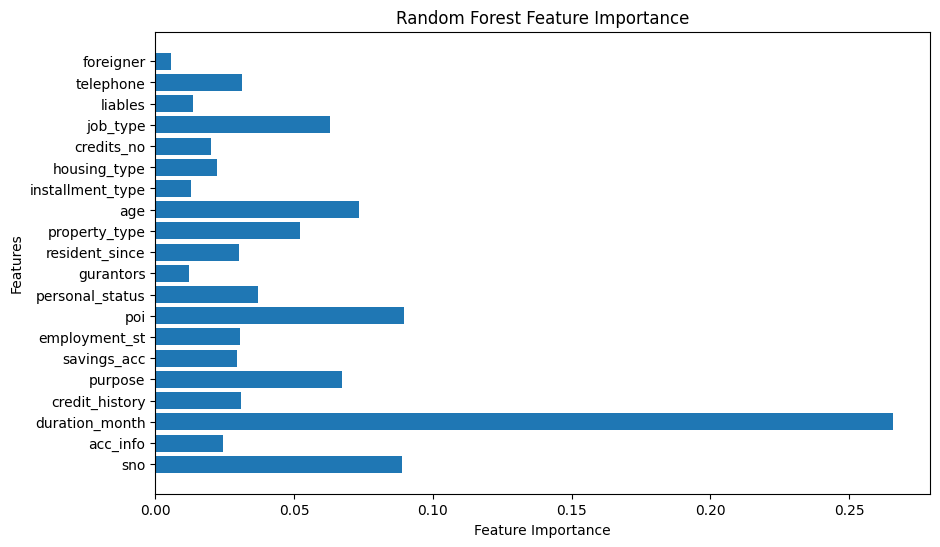

In [40]:
import matplotlib.pyplot as plt

# Feature importance for Random Forest
feature_importance_rf = best_rf.feature_importances_

# Plotting feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance_rf)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


Important Features:


**foreigner: **This feature seems to be the most important according to the plot. It suggests that whether an applicant is a foreigner or not significantly impacts the model's decision on creditworthiness.

**telephone: **Having a telephone appears to be another important factor influencing the model's prediction.

Moderately Important Features:

**liables (dependents)**: The number of dependents an applicant has seems to be moderately important for the model.

**job_type**: The specific type of job the applicant holds also seems to have some influence.

Less Important Features:

All other features, including credit history, housing type, loan purpose, etc., appear to have a lower impact on the model's prediction compared to the features mentioned above.

***Overall, this feature importance plot suggests that the model relies heavily on an applicant's residency status and phone ownership to predict creditworthiness. Further analysis is recommended to ensure the model considers the most relevant factors and avoids biases.***

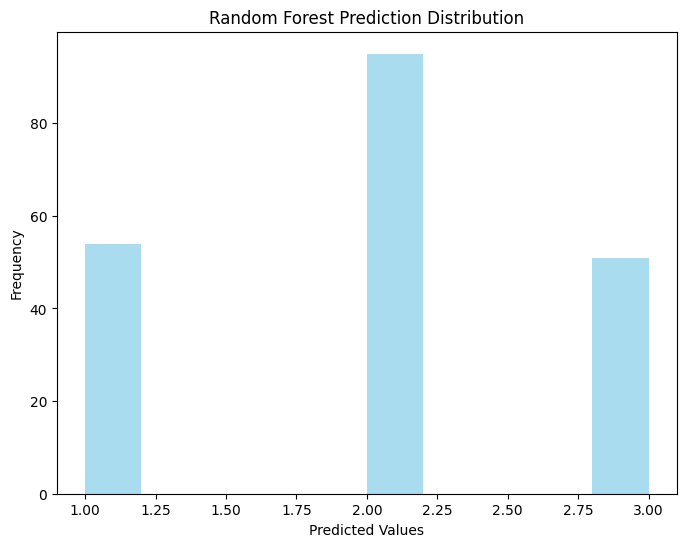

In [41]:
# Prediction distribution plot for Random Forest
plt.figure(figsize=(8, 6))
plt.hist(y_pred_rf, bins=10, color='skyblue', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Random Forest Prediction Distribution')
plt.show()



The prediction distribution graph shows how likely applicants are to be approved for a loan (binary classification).

X-axis: Represents the predicted probability of loan approval (0 = unlikely, 1 = highly likely).

Y-axis: Represents the number of applicants for each probability range.
Distribution Analysis:

**Balanced distribution:** A bell-shaped curve centered around 0.5 suggests the model predicts a similar number of approvals and rejections.

**Bias:** A skewed curve towards 0 or 1 indicates the model favors approvals (skewed towards 1) or rejections (skewed towards 0).

**Uncertainty:** Multiple peaks might suggest difficulty distinguishing between approval and rejection for some applicants.


In [47]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get the number of unique classes in y_test
num_classes = len(np.unique(y_test))

# Get predicted probabilities instead of predictions
y_pred_prob_rf = best_rf.predict_proba(X_test)
